In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_csv('heartdisease.csv')

In [3]:
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
df.columns

Index(['63', '1', '4', '140', '260', '0', '1.1', '112', '1.2', '3', '2', '?',
       '?.1', '2.1'],
      dtype='object')

In [5]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [7]:
df.replace('?',np.nan, inplace=True)

In [8]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

trestbps : ['130' '132' '142' '110' '120' '150' '180' '160' '126' '140' nan '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
120    16
130    15
140     9
150     9
110     9
160     8
122     6
142     5
144     4
128     4
126     4
170     4
124     4
136     4
134     4
158     3
132     3
125     2
154     2
116     2
104     2
112     2
138     2
152     2
155     2
180     2
102     1
114     1
135     1
127     1
96      1
146     1
190     1
106     1
156     1
100     1
172     1
0       1
118     1
178     1
Name: trestbps, dtype: int64
_________________________________________________________________
chol : ['209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186' '100'
 '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311' '270'
 '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248' '308'
 '208' '227' '210' '245'

In [9]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
target        0
dtype: int64

In [11]:
df.shape

(199, 14)

In [12]:
# Drop the columns
df = df.drop(['slope', 'ca', 'thal'], axis=1)

In [13]:
df=df.fillna(method='ffill')

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,44,1,4,130,209,0,1,127,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,2
2,55,1,4,142,228,0,1,149,1,2.5,1
3,66,1,3,110,213,1,2,99,1,1.3,0
4,66,1,3,120,0,0,1,120,0,-0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,1
195,62,1,1,127,139,0,1,154,0,0,0
196,55,1,4,122,223,1,1,100,0,0,2
197,58,1,4,122,385,1,2,100,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002593D302130>,
      dtype=object)

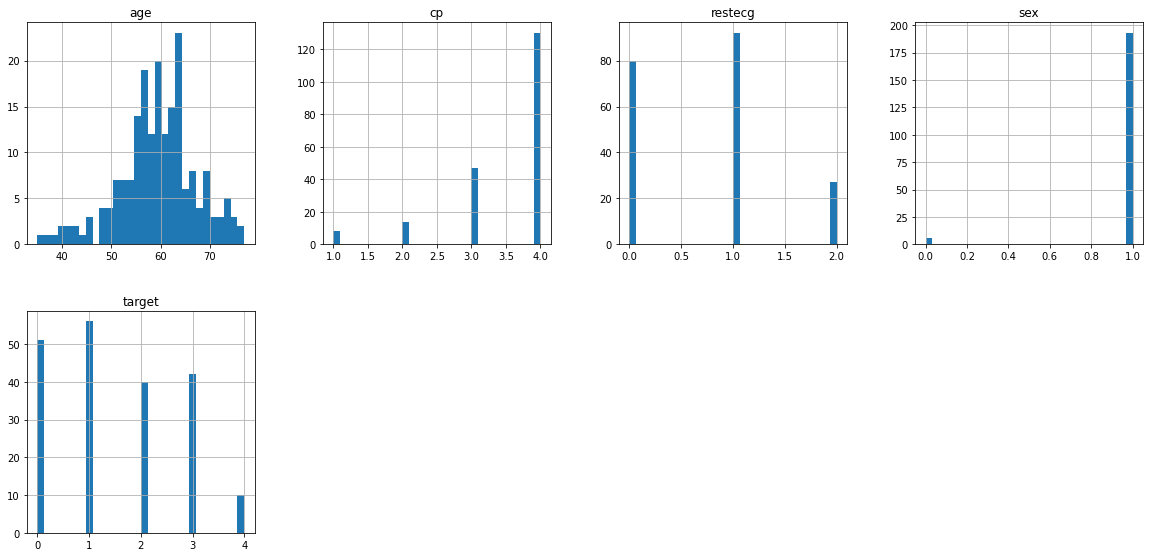

In [15]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

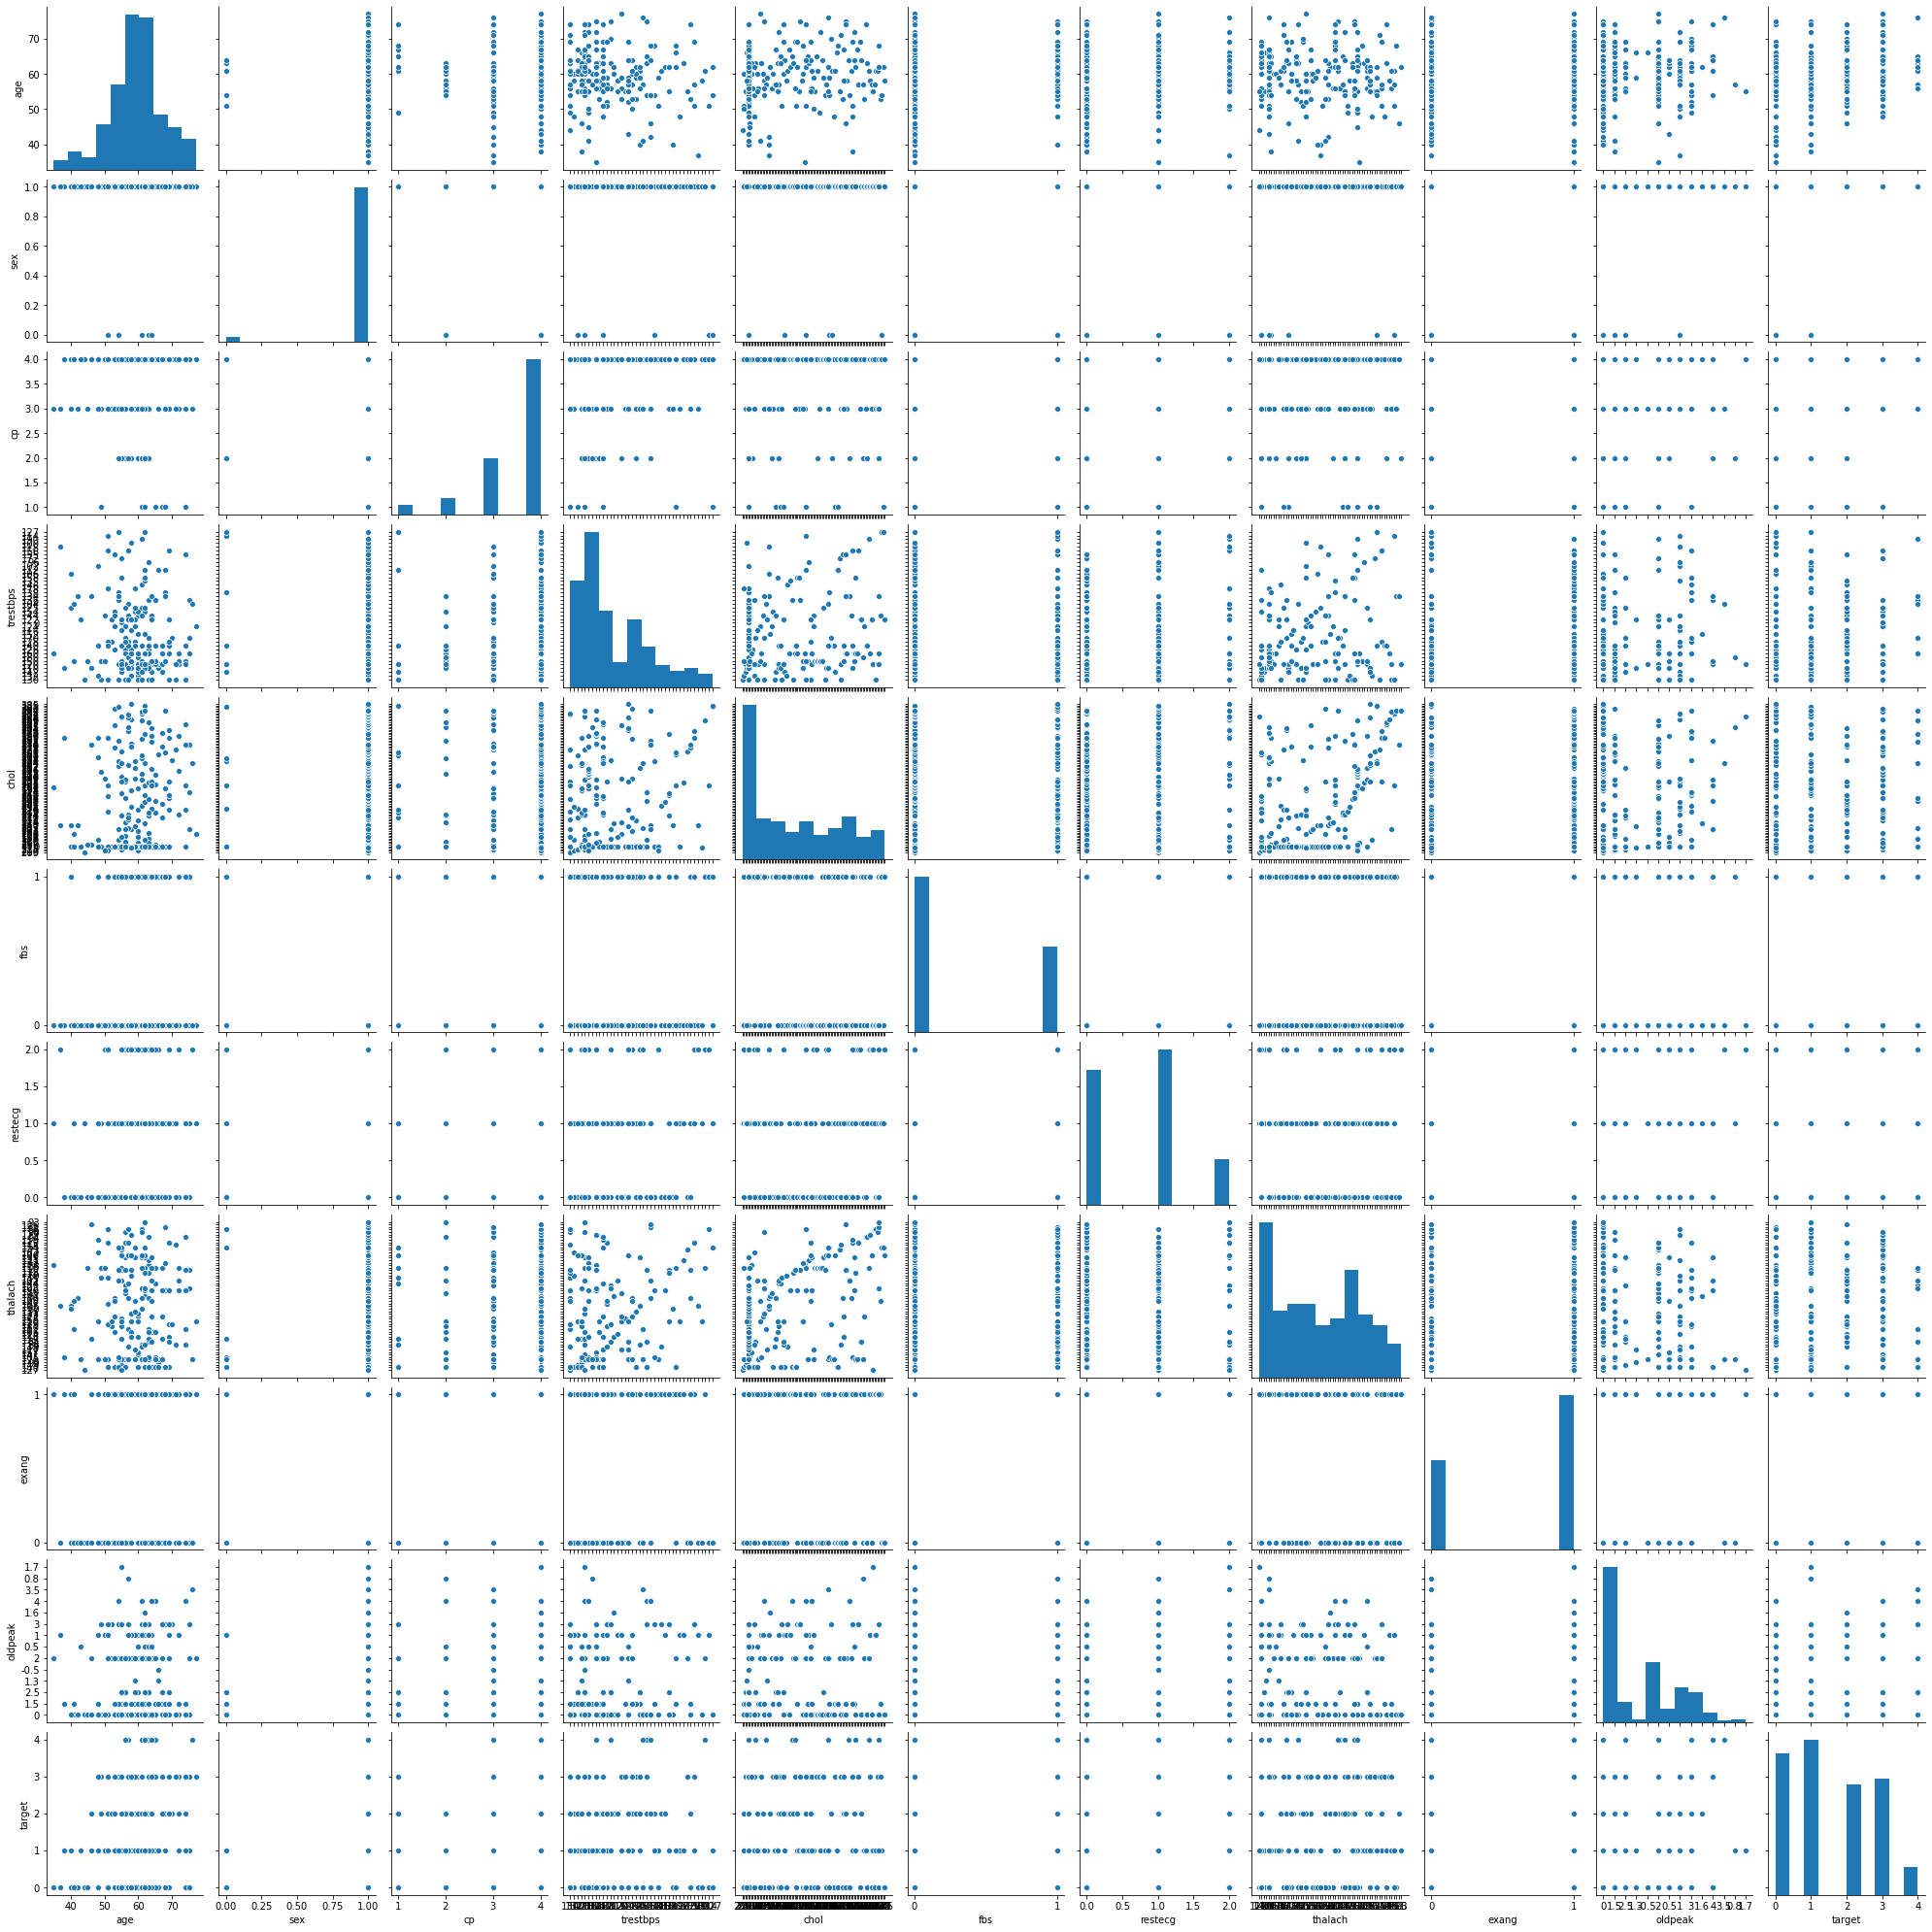

In [16]:
sns.pairplot(df)

In [17]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
target       int64
dtype: object

In [18]:
df['trestbps']=df['trestbps'].astype(str).astype(int)

In [19]:
df['chol']=df['chol'].astype(str).astype(int)

In [20]:
df['thalach']=df['thalach'].astype(str).astype(int)

In [21]:
df['exang']=df['exang'].astype(str).astype(int)

In [22]:
df['oldpeak']=df['oldpeak'].astype(str).astype(float)

In [23]:
df['fbs']=df['fbs'].astype(str).astype(float)

In [24]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int32
chol          int32
fbs         float64
restecg       int64
thalach       int32
exang         int32
oldpeak     float64
target        int64
dtype: object

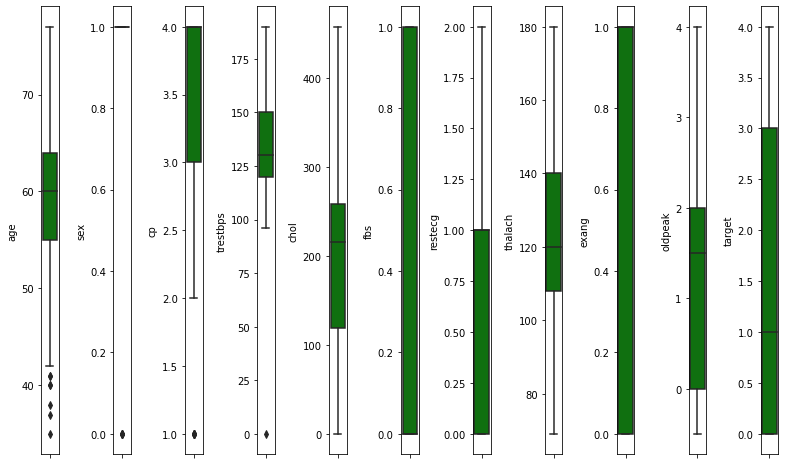

In [25]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.033837,-0.039809,0.105585,0.055690,0.148400,0.001487,-0.158730,0.093768,0.085484,0.286630
sex,0.033837,1.000000,0.037525,0.037841,-0.091361,-0.052712,0.060305,-0.004864,-0.012256,0.045318,0.147190
cp,-0.039809,0.037525,1.000000,0.105085,0.072280,-0.035344,0.033617,-0.083284,0.192599,0.025755,0.167202
trestbps,0.105585,0.037841,0.105085,1.000000,0.202277,0.180549,0.090804,0.061283,0.197629,0.124862,0.143637
chol,0.055690,-0.091361,0.072280,0.202277,1.000000,0.148965,0.020912,-0.030255,0.023109,-0.018133,0.073474
fbs,0.148400,-0.052712,-0.035344,0.180549,0.148965,1.000000,0.167505,0.032773,-0.173141,-0.031029,0.053795
restecg,0.001487,0.060305,0.033617,0.090804,0.020912,0.167505,1.000000,-0.024065,-0.022011,-0.089224,-0.033597
thalach,-0.158730,-0.004864,-0.083284,0.061283,-0.030255,0.032773,-0.024065,1.000000,-0.099031,0.137894,-0.044867
exang,0.093768,-0.012256,0.192599,0.197629,0.023109,-0.173141,-0.022011,-0.099031,1.000000,0.388637,0.203445
oldpeak,0.085484,0.045318,0.025755,0.124862,-0.018133,-0.031029,-0.089224,0.137894,0.388637,1.000000,0.341697


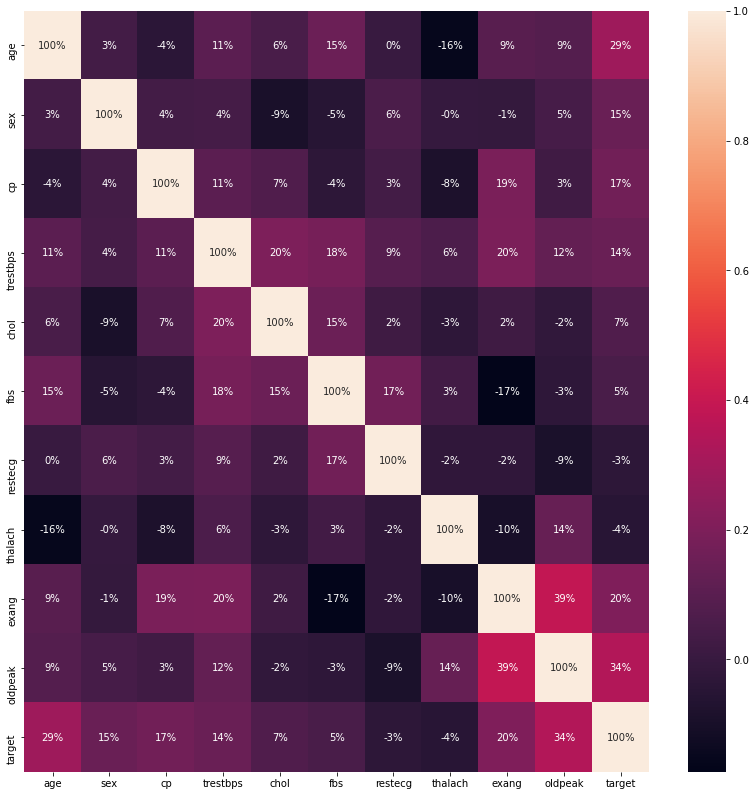

In [27]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [28]:
df.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -1.078041
chol       -0.588915
fbs         0.602467
restecg     0.396540
thalach     0.069006
exang      -0.556829
oldpeak     0.390600
target      0.302681
dtype: float64

In [29]:
X = df.drop(['target'] , axis = 1)
Y = df['target']

In [30]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [31]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
  
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
return  knn, svc_lin, svc_rbf, gauss, tree, forest


[1]K Nearest Neighbor Training Accuracy: 0.47651006711409394
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.4429530201342282
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.33557046979865773
[4]Gaussian Naive Bayes Training Accuracy: 0.3221476510067114
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9865771812080537


SyntaxError: 'return' outside function (<ipython-input-31-40ca4951da27>, line 39)

In [32]:
import pickle 
filename = 'project5_heartdisease.pkl'
pickle.dump(forest,open(filename, 'wb'))

In [33]:
import numpy as np
a=np.array(Y_test)
predicted=np.array(forest.predict(X_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,1
1,1,3
2,1,2
3,1,0
4,2,2
5,0,0
6,3,2
7,0,2
8,1,1
9,3,2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,44,1,4,130,209,0.0,1,127,0,0.0,NaN
1,60,1,4,132,218,0.0,1,140,1,1.5,NaN
2,55,1,4,142,228,0.0,1,149,1,2.5,NaN
3,66,1,3,110,213,1.0,2,99,1,1.3,NaN
4,66,1,3,120,0,0.0,1,120,0,-0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1.0,1,154,0,0.0,NaN
195,62,1,1,127,139,0.0,1,154,0,0.0,NaN
196,55,1,4,122,223,1.0,1,100,0,0.0,NaN
197,58,1,4,122,385,1.0,2,100,0,0.0,NaN
